<a href="https://colab.research.google.com/github/ektaarora3501/Neural-Networks/blob/master/Facial_Expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"python3501","key":"51f324c5356765124f897b54dbe8f4d1"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [0]:
!pip install tensorflow==1.14

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import random
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger


In [0]:
!pip install livelossplot
from livelossplot import PlotLossesKeras


In [16]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

face-expression-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip \*.zip
!ls

In [21]:
base_dir='/images'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
print(train_dir)

/images/train


(48, 48)


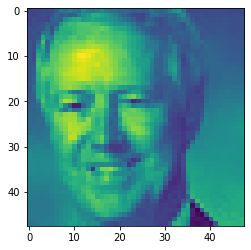

In [6]:
example_image_happy=random.choice(os.listdir('images/train/happy'))
example=plt.imread('images/train/happy/'+example_image_happy)
plt.grid(False)
plt.imshow(example)
print(example.shape)

In [0]:
IMAGE_SIZE=48
IMAGE_WIDTH=48
IMAGE_HEIGHT=48
TRAININNG_EPOCHS=5
BATCH_SIZE=500
INPUT_SHAPE=(IMAGE_WIDTH,IMAGE_HEIGHT,3)


In [0]:
#creating layers using keras
model=Sequential()
model.add(Conv2D(32, (3,3),border_mode='same',input_shape=INPUT_SHAPE,activation='relu'))
model.add(Conv2D(32, (3,3),border_mode='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),border_mode='same',activation='relu'))
model.add(Conv2D(64, (3,3),border_mode='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),border_mode='same',activation='relu'))
model.add(Conv2D(128, (3,3),border_mode='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3),border_mode='same',activation='relu'))
model.add(Conv2D(256, (3,3),border_mode='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),  #setting the learning rate
              metrics=['accuracy'])  #as there are two classes
 

In [0]:
train_dir='images/train'
train_data_gen=ImageDataGenerator(
         rescale=1./255,
         shear_range=0.1,
         zoom_range=0.1,
         horizontal_flip=True,
         
)

training_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")

print(training_generator.class_indices)

model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames),
    epochs=TRAININNG_EPOCHS,
    callbacks=[PlotLossesKeras()],verbose=1)